In [0]:
from pyspark.sql.types import *
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

spark = SparkSession.builder.getOrCreate()

In [0]:
profiles = spark.read.parquet('/linkedin/people')
sampled_profiles = profiles.sample(withReplacement=False, fraction=0.01, seed=42) # small data
sampled_profiles.printSchema()

root
 |-- about: string (nullable = true)
 |-- avatar: string (nullable = true)
 |-- certifications: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- meta: string (nullable = true)
 |    |    |-- subtitle: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- current_company: struct (nullable = true)
 |    |-- company_id: string (nullable = true)
 |    |-- industry: string (nullable = true)
 |    |-- link: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- title: string (nullable = true)
 |-- current_company:company_id: string (nullable = true)
 |-- current_company:name: string (nullable = true)
 |-- education: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- degree: string (nullable = true)
 |    |    |-- end_year: string (nullable = true)
 |    |    |-- field: string (nullable = true

In [0]:
companies = spark.read.parquet('/linkedin/companies')
sampled_companies = companies.sample(withReplacement=False, fraction=0.01, seed=42)  # small data
sampled_companies.printSchema()

root
 |-- about: string (nullable = true)
 |-- affiliated: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- Links: string (nullable = true)
 |    |    |-- location: string (nullable = true)
 |    |    |-- subtitle: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- company_id: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- crunchbase_url: string (nullable = true)
 |-- employees: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- img: string (nullable = true)
 |    |    |-- link: string (nullable = true)
 |    |    |-- subtitle: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- employees_in_linkedin: long (nullable = true)
 |-- followers: long (nullable = true)
 |-- formatted_locations: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- founded: long (nullable = true

In [0]:
meta_industries_12 = {
    'Furniture and Home Furnishings Manufacturing': 'Manufacturing',
    'Investment Banking': 'Financial and Investment',
    'Architecture and Planning': 'Services',
    'Wholesale': 'Services',
    'Travel Arrangements': 'Services',
    'Ranching': 'Miscellaneous',
    'Hospitals and Health Care': 'Healthcare and Medical',
    'Book and Periodical Publishing': 'Services',
    'Printing Services': 'Services',
    'Professional Training and Coaching': 'Services',
    'Computers and Electronics Manufacturing': 'Manufacturing',
    'Shipbuilding': 'Manufacturing',
    'Public Policy Offices': 'Government and Public Policy',
    'Software Development': 'Technology',
    'Outsourcing and Offshoring Consulting': 'Services',
    'Retail Groceries': 'Retail and Consumer Goods',
    'Education Administration Programs': 'Education and Training',
    'Plastics Manufacturing': 'Manufacturing',
    'Renewable Energy Semiconductor Manufacturing': 'Manufacturing',
    'Computer Networking Products': 'Technology',
    'Events Services': 'Services',
    'Information Services': 'Services',
    'Food and Beverage Services': 'Services',
    'Semiconductor Manufacturing': 'Manufacturing',
    'Business Consulting and Services': 'Services',
    'Insurance': 'Services',
    'Financial Services': 'Services',
    'Wireless Services': 'Services',
    'Computer Hardware Manufacturing': 'Technology',
    'Public Safety': 'Services',
    'Maritime Transportation': 'Transportation and Logistics',
    'Tobacco Manufacturing': 'Manufacturing',
    'Writing and Editing': 'Services',
    'Veterinary Services': 'Services',
    'Staffing and Recruiting': 'Services',
    'Accounting': 'Services',
    'International Affairs': 'Government and Public Policy',
    'Spectator Sports': 'Miscellaneous',
    'Glass, Ceramics and Concrete Manufacturing': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Mining': 'Miscellaneous',
    'E-Learning Providers': 'Technology',
    'Security and Investigations': 'Services',
    'Translation and Localization': 'Services',
    'Automation Machinery Manufacturing': 'Technology',
    'Computer and Network Security': 'Technology',
    'Political Organizations': 'Government and Public Policy',
    'Environmental Services': 'Government and Public Policy',
    'Oil and Gas': 'Miscellaneous',
    'Real Estate': 'Real Estate and Construction',
    'Think Tanks': 'Government and Public Policy',
    'Executive Offices': 'Miscellaneous',
    'Law Practice': 'Services',
    'Nanotechnology Research': 'Miscellaneous',
    'International Trade and Development': 'Government and Public Policy',
    'Personal Care Product Manufacturing': 'Manufacturing',
    'Philanthropic Fundraising Services': 'Services',
    'Entertainment Providers': 'Media and Entertainment',
    'Market Research': 'Media and Entertainment',
    'Movies, Videos, and Sound': 'Media and Entertainment',
    'Sporting Goods Manufacturing': 'Manufacturing',
    'Graphic Design': 'Services',
    'Technology, Information and Internet': 'Technology',
    'IT Services and IT Consulting': 'Technology',
    'Retail Office Equipment': 'Retail and Consumer Goods',
    'Wholesale Import and Export': 'Services',
    'Capital Markets': 'Financial and Investment',
    'Law Enforcement': 'Services',
    'Freight and Package Transportation': 'Transportation and Logistics',
    'Industrial Machinery Manufacturing': 'Manufacturing',
    'Non-profit Organizations': 'Miscellaneous',
    'Retail Art Supplies': 'Retail and Consumer Goods',
    'Animation and Post-production': 'Media and Entertainment',
    'Transportation, Logistics, Supply Chain and Storage': 'Transportation and Logistics',
    'Aviation and Aerospace Component Manufacturing': 'Transportation and Logistics',
    'Fundraising': 'Financial and Investment',
    'Railroad Equipment Manufacturing': 'Transportation and Logistics',
    'Construction': 'Real Estate and Construction',
    'Investment Management': 'Financial and Investment',
    'Utilities': 'Miscellaneous',
    'Retail Luxury Goods and Jewelry': 'Retail and Consumer Goods',
    'Warehousing and Storage': 'Transportation and Logistics',
    'Media Production': 'Media and Entertainment',
    'Gambling Facilities and Casinos': 'Media and Entertainment',
    'Defense and Space Manufacturing': 'Manufacturing',
    'Facilities Services': 'Services',
    'Government Relations Services': 'Government and Public Policy',
    'Advertising Services': 'Media and Entertainment',
    'Paper and Forest Product Manufacturing': 'Manufacturing',
    'Packaging and Containers Manufacturing': 'Manufacturing',
    'Telecommunications': 'Technology',
    'Medical Equipment Manufacturing': 'Healthcare and Medical',
    'Beverage Manufacturing': 'Manufacturing',
    'Restaurants': 'Retail and Consumer Goods',
    'Leasing Non-residential Real Estate': 'Real Estate and Construction',
    'Newspaper Publishing': 'Media and Entertainment',
    'Armed Forces': 'Miscellaneous',
    'Appliances, Electrical, and Electronics Manufacturing': 'Manufacturing',
    'Hospitality': 'Services',
    'Pharmaceutical Manufacturing': 'Healthcare and Medical',
    'Research Services': 'Services',
    'Retail Apparel and Fashion': 'Retail and Consumer Goods',
    'Photography': 'Media and Entertainment',
    'Wellness and Fitness Services': 'Services',
    'Truck Transportation': 'Transportation and Logistics',
    'Consumer Services': 'Services',
    'Wholesale Building Materials': 'Services',
    'Human Resources Services': 'Services',
    'Airlines and Aviation': 'Transportation and Logistics',
    'Machinery Manufacturing': 'Manufacturing',
    'Individual and Family Services': 'Services',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Performing Arts': 'Media and Entertainment',
    'Museums, Historical Sites, and Zoos': 'Media and Entertainment',
    'Broadcast Media Production and Distribution': 'Media and Entertainment',
    'Banking': 'Financial and Investment',
    'Recreational Facilities': 'Miscellaneous',
    'Government Administration': 'Government and Public Policy',
    'Public Relations and Communications Services': 'Media and Entertainment',
    'Fisheries': 'Miscellaneous',
    'Medical Practices': 'Healthcare and Medical',
    'Religious Institutions': 'Miscellaneous',
    'Online Audio and Video Media': 'Media and Entertainment',
    'Artists and Writers': 'Miscellaneous',
    'Biotechnology Research': 'Healthcare and Medical',
    'Legal Services': 'Services',
    'Retail': 'Retail and Consumer Goods',
    'Civil Engineering': 'Services',
    'Libraries': 'Miscellaneous',
    'Alternative Dispute Resolution': 'Miscellaneous',
    'Manufacturing': 'Miscellaneous',
    'Design Services': 'Services',
    'Dairy Product Manufacturing': 'Manufacturing',
    'Higher Education': 'Education and Training',
    'Civic and Social Organizations': 'Miscellaneous',
    'Textile Manufacturing': 'Manufacturing',
    'Venture Capital and Private Equity Principals': 'Financial and Investment',
    'Mental Health Care': 'Healthcare and Medical',
    'Musicians': 'Media and Entertainment',
    'Farming': 'Miscellaneous',
    'Computer Games': 'Media and Entertainment',
    'Strategic Management Services': 'Services',
    'Food and Beverage Manufacturing': 'Manufacturing',
    'Primary and Secondary Education': 'Education and Training',
    'Alternative Medicine': 'Healthcare and Medical',
    'Legislative Offices': 'Services',
    'Administration of Justice': 'Services',
    'Mobile Gaming Apps': 'Media and Entertainment'
}

In [0]:
# Add meta_industry label column
from pyspark.sql.functions import col

meta_industry = udf(lambda x: meta_industries_12[x])
ind_companies = companies.dropna(subset=['industries'])
ind_companies = ind_companies.withColumn('meta_industry', meta_industry(col('industries')))

In [0]:
ind_companies.select('url').distinct().sort('url').display()

url https://www.linkedin.com/company/%C2%A1lomo-%C2%A1lomo- https://www.linkedin.com/company/%C2%A1votaya- https://www.linkedin.com/company/%C3%A0-la-maltaise https://www.linkedin.com/company/%C3%A0royal-crown-salon https://www.linkedin.com/company/%C3%A1lainn https://www.linkedin.com/company/%C3%A6ther-bureau https://www.linkedin.com/company/%C3%A7%C3%B6p%C3%BCne-sahip-%C3%A7%C4%B1k-vakf%C4%B1 https://www.linkedin.com/company/%C3%A8ple https://www.linkedin.com/company/%C3%A9clair%C3%A9e https://www.linkedin.com/company/%C3%A9clair-me https://www.linkedin.com/company/%C3%A9cole-house https://www.linkedin.com/company/%C3%A9levage https://www.linkedin.com/company/%C3%A9lys%C3%A9es https://www.linkedin.com/company/%C3%A9quilibre-biopharmaceuticals-corp https://www.linkedin.com/company/%C3%A9quit%C3%A9-elevate-your-brand https://www.linkedin.com/company/%C3%A9staine https://www.linkedin.com/company/%C3%ADdolos-do-bem https://www.linkedin.com/company/%C3%B3timo-dance https://www.linkedin.com/company/%C3%B6kologie-l3c https://www.linkedin.com/company/%C3%B8nyx-fitness https://www.linkedin.com/company/%C3%B8s-design-group-inc- https://www.linkedin.com/company/%C4%93koserve https://www.linkedin.com/company/%C5%8Dpes-properties https://www.linkedin.com/company/%C5%A1koda-auto-india-private-limited https://www.linkedin.com/company/%C5%BCmudzki-consulting-llc https://www.linkedin.com/company/%C9%99l%C4%93l https://www.linkedin.com/company/%CF%89-agency https://www.linkedin.com/company/%D1%82%D0%B5%D0%BF%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D0%B9-%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81-%D0%B7%D0%B5%D0%BB%D0%B5%D0%BD%D1%8B%D0%B9-%D0%BB%D1%83%D1%87- https://www.linkedin.com/company/%D7%A9%D7%91%D7%99%D7%A8%D7%95-%D7%92%D7%9C%D7%90%D7%A1-%D7%94%D7%A8%D7%A6%D7%9C%D7%99%D7%94 https://www.linkedin.com/company/%D8%A7%D9%84%D8%B9%D9%84%D8%A7%D9%8A-%D9%84%D8%B5%D9%8A%D8%A7%D9%86%D9%87-%D9%88%D8%AA%D8%AC%D8%A7%D8%B1%D8%A9-%D8%A7%D9%84%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D8%A7%D9%84%D9%85%D8%B1%D8%B3%D9%8A%D8%AF%D8%B3 https://www.linkedin.com/company/%D8%A7%D9%84%D9%85%D8%AE%D9%8A%D9%85-%D8%A7%D9%84%D8%A5%D9%81%D8%AA%D8%B1%D8%A7%D8%B6%D9%8A-%D9%84%D8%AA%D9%82%D9%86%D9%8A%D8%A7%D8%AA-%D8%A7%D9%84%D8%AA%D8%B3%D9%88%D9%8A%D9%82-%D8%A7%D9%84%D9%85%D8%B9%D8%A7%D8%B5%D8%B1%D8%A9-mmtvc https://www.linkedin.com/company/%D8%A8%D9%87%D8%A7%D8%B1-%D8%B3%D9%88%D9%85-%D9%81%D8%A7%D8%B1%D8%B3 https://www.linkedin.com/company/%D8%AA%D8%AD%D8%AA-%D8%A7%D9%84%D9%85%D8%AC%D9%87%D8%B1-%D9%85%D9%86-%D8%A3%D9%85%D8%B1%D9%8A%D9%83%D8%A7 https://www.linkedin.com/company/%D8%AF%D9%84%D9%8A%D9%84-%D8%B4%D8%B1%D9%83%D8%A7%D8%AA-%D9%86%D9%82%D9%84-%D8%A7%D9%84%D8%B9%D9%81%D8%B4-%D9%81%D9%89-%D9%85%D8%B5%D8%B1 https://www.linkedin.com/company/%D8%B4%D8%B1%D9%83%D8%A9-%D8%A7%D9%84%D8%A3%D9%85%D8%B1%D8%A7%D8%A1-%D9%84%D8%A3%D8%AB%D8%A7%D8%AB-%D9%85%D9%86%D8%B2%D9%84%D9%8A https://www.linkedin.com/company/%D8%B5%D8%A7%D9%84%D9%88%D9%86%D8%A7%D8%AA-%D9%85%D9%88%D8%AF%D8%B1%D9%86 https://www.linkedin.com/company/%E1%B5%97%CA%B3%E1%B5%83%CB%A2%E1%B4%B4-%E1%B6%9C%E1%B5%83%E1%B5%97%CB%A2 https://www.linkedin.com/company/%E2%80%8Bdanbury-elks-lodge-no-120 https://www.linkedin.com/company/%E2%80%9857-heaven https://www.linkedin.com/company/%E2%80%9863-south https://www.linkedin.com/company/%E2%80%98ahahui-hawai%E2%80%98i-o-minnesota https://www.linkedin.com/company/%E2%80%98dack-shack https://www.linkedin.com/company/%E2%80%98ehukai-beach-park https://www.linkedin.com/company/%E2%80%98iao-valley-state-monument https://www.linkedin.com/company/%E2%80%98ikenakea-development https://www.linkedin.com/company/%E5%B0%8F%E6%88%B4%E6%B2%A1%E5%BE%97%E8%A7%89%E7%9D%A1 https://www.linkedin.com/company/%E6%88%90%E9%83%BD%E5%96%84%E7%8C%8E%E4%BC%81%E4%B8%9A%E7%AE%A1%E7%90%86%E5%92%A8%E8%AF%A2%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8 https://www.linkedin.com/company/%E6%9C%AA%E6%9D%A5live%E7%A7%91%E6%8A%80%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8 https://www.linkedin.com/company/%E7%9C%81%E4%BA%8B%E5%84%BF-

## Company Similarity Model

In [0]:
# NLP imports:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Pyspark imports
from pyspark.sql.functions import udf, abs, size, col, when, concat, array, lit, rand, count, explode, regexp_replace, expr
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, IntegerType

# download NLTK stopwords:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('punkt')
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 1: create training data - similar companies + negative sampling

This is a similar algorithm to the one in HW2, where we tried to 

In [0]:
similarity_features_cols_short = ['name', 'about', 'company_size', 'industries', 'locations', 'slogan', 'meta_industry']
similarity_features_cols = ['company_A_name', 'company_B_name', 'company_A_about', 'company_B_about', 'company_A_company_size', 'company_B_company_size', 'company_A_industries', 'company_B_industries', 'company_A_locations', 'company_B_locations', 'company_A_slogan', 'company_B_slogan', 'company_A_meta_industry', 'company_B_meta_industry']

In [0]:
### Positive Sampling:

## Exploding the 'similar' attribute:
cols_list = ind_companies.columns
exploded_similar_df = ind_companies.withColumn("similar", explode(col("similar"))) \
                        .withColumn("link", col('similar').Links).withColumn("title", col('similar').title).select('name', 'url', 'title', 'link')

df = exploded_similar_df

# Reformat links to match:
new_df = df.withColumn("url", regexp_replace(col("url"), "\?trk=similar-pages", ""))
new_df = new_df.withColumn("link", regexp_replace(col("link"), "\?trk=similar-pages", ""))
new_df = new_df.na.drop(subset=['url', 'link'])

## Naming conventions:
# make sure the companies are A, B according to lexicographical value of the name column:
new_df = new_df.withColumn("company_A_name", when(new_df["name"] < new_df["title"], new_df["name"]).otherwise(new_df["title"]))
new_df = new_df.withColumn("company_B_name", when(new_df["name"] >= new_df["title"], new_df["name"]).otherwise(new_df["title"]))

# match the url (join key):
new_df = new_df.withColumn("company_A_url", when(new_df["company_A_name"] == new_df["name"], new_df["url"]).otherwise(new_df["link"]))
new_df = new_df.withColumn("company_B_url", when(new_df["company_B_name"] == new_df["name"], new_df["url"]).otherwise(new_df["link"]))

# remove self similarity:
new_df = new_df.filter(expr("company_A_name != company_B_name"))
new_df = new_df.select("company_A_url", "company_B_url")

# Add all relevant columns for company A:
df_with_comp_A = new_df.join(ind_companies, on=new_df['company_A_url'] == ind_companies['url'], how='inner')
df_with_comp_A = df_with_comp_A.drop('similar')

# Rename company A columns:
for col_name in cols_list:
    if col_name != 'url':
        df_with_comp_A = df_with_comp_A.withColumnRenamed(col_name, "company_A_" + col_name)
df_with_comp_A = df_with_comp_A.drop('url')

# Add all relevant columns for company B:
df_with_comp_B = df_with_comp_A.join(ind_companies, on=new_df['company_B_url'] == ind_companies['url'], how='inner')
df_with_comp_B = df_with_comp_B.drop('similar')

# Rename company B columns:
for col_name in cols_list:
    if col_name != 'url':
        df_with_comp_B = df_with_comp_B.withColumnRenamed(col_name, "company_B_" + col_name)
df_with_comp_B = df_with_comp_B.drop('url')

# Reorder columns with name column first and original order for A and B, without unnecessary columns (acording to instructions and forum):
columns_order = ["company_A_name"] + ["company_A_" + col_name for col_name in cols_list if col_name not in ["name", "similar"]] + \
                ["company_B_name"] + ["company_B_" + col_name for col_name in cols_list if col_name not in ["name", "similar"]]
final_df = df_with_comp_B.select(*columns_order).dropDuplicates() # reorder

print(final_df.count())

79112


In [0]:
### Negative Sampling:

# create a df of URLs to exclude (since they are in the positive samples):
urls_to_exclude_df = final_df.select("company_A_url").union(final_df.select("company_B_url")).distinct()
urls_to_exclude_df = urls_to_exclude_df.withColumnRenamed("company_A_url", "url")

# perform a left anti-join with a sample of the companies to get some examples
sampled_companies_neg = ind_companies.sample(withReplacement=False, fraction=0.01, seed=42) # with meta-industry
sampled_companies_neg = sampled_companies_neg.select(*similarity_features_cols_short, 'url')
negative_sample_companies = sampled_companies_neg.join(urls_to_exclude_df, ["url"], "left_anti")

# create pairs of non-similar companies:
df1 = negative_sample_companies.alias("df1")
df2 = negative_sample_companies.alias("df2")

url_pairs = df1.crossJoin(df2).select(
    col("df1.url").alias("company_A_url"),
    col("df2.url").alias("company_B_url")
).limit(80000)


## return back the additional columns for the companies picked:

# company A:
enriched_negative_samples = url_pairs \
    .join(sampled_companies_neg, on=url_pairs["company_A_url"] == sampled_companies_neg['url'], how="inner")

for col_name in cols_list:
    if col_name != 'url':
        enriched_negative_samples = enriched_negative_samples.withColumnRenamed(col_name, "company_A_" + col_name)
enriched_negative_samples = enriched_negative_samples.drop('url')

# company B:
enriched_negative_samples = enriched_negative_samples \
    .join(sampled_companies_neg, on=enriched_negative_samples["company_B_url"] == sampled_companies_neg['url'], how="inner")

for col_name in cols_list:
    if col_name != 'url':
        enriched_negative_samples = enriched_negative_samples.withColumnRenamed(col_name, "company_B_" + col_name)
enriched_negative_samples = enriched_negative_samples.drop('url')

print(enriched_negative_samples.count())

80000


In [0]:
# Positive:
final_df = final_df.select(*similarity_features_cols).withColumn('similarity_label', lit(1))

# Negative:
enriched_negative_samples = enriched_negative_samples.select(*similarity_features_cols).withColumn('similarity_label', lit(0))

# combine positive and negative sample, with label in col 'similarity_label':
data = final_df.unionByName(enriched_negative_samples)

# show the similar proportions of samples:
data.groupBy("similarity_label").agg(count("*").alias("count")).show()

+----------------+-----+
|similarity_label|count|
+----------------+-----+
|               1|79112|
|               0|80000|
+----------------+-----+



### Step 2: Training a Random Forest Model

In [0]:
# define a function for stemming:
def stem_text(text):
    """
    Tokenize text and remove stopwords.
    input: text to tokenize
    output: preprocessed text
    """
    tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

# define a function to calculate similarity between 2 text blocks:
def calculate_similarity(text1, text2, stemming=True):
    """
    Find cosine similarity between tf-idf vectors of the input texts.
    ouput: single similarity score
    """
    # if one or more of the texts are empty, define as 0 similarity:
    if text1 is None or text2 is None:
        return 0.0
    
    # preprocess the texts if neccesary: (not good for short imputs like names)
    if stemming:
        text1 = stem_text(text1)
        text2 = stem_text(text2)

    # create TF-IDF vectors:
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])

    # calculate cosine similarity:
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    return float(similarity_score)

# udf for text similarity:
similarity_udf = udf(lambda text1, text2, stemming: calculate_similarity(text1, text2, stemming), DoubleType())

In [0]:
### Create general features:

def extract_features_from_data(data, train):
    """
    Assume data contains the columns in similarity_features_cols.
    Create a features df for random forest model
    """

    # about (with stemming):
    data = data.withColumn('about_similarity_score', similarity_udf(col('company_A_about'), col('company_B_about'), lit(True)))

    # name (without stemming):
    data = data.withColumn('name_similarity_score', similarity_udf(data['company_A_name'], data['company_B_name'], lit(False)))

    # slogan (without stemming):
    data = data.withColumn('slogan_similarity_score', similarity_udf(data['company_A_slogan'], data['company_B_slogan'], lit(False)))

    # locations (number of locations per company):
    data = data.withColumn('company_A_locnum', size(col('company_A_locations'))).withColumn('company_B_locnum', size(col('company_B_locations')))

    # interval numerical variable for compay size:
    comp_size_dict = {
        '': 0,
        'None': 0,
        '1 employee': 1,
        '2-10 employees': 2,
        '11-50 employees': 3,
        '51-200 employees': 4,
        '201-500 employees': 5,
        '501-1,000 employees': 6,
        '1,001-5,000 employees': 7,
        '5,001-10,000 employees': 8,
        '10,001+ employees': 9
    }
    comp_size_udf = udf(lambda x: comp_size_dict.get(x, 0), IntegerType())

    data = data.withColumn('company_A_numerical_size',
                            when(col('company_A_company_size').isNull() | 
                                    (col('company_A_company_size') == 'None') | 
                                    (col('company_A_company_size') == ''), 0)
                            .otherwise(comp_size_udf(col('company_A_company_size'))))
    data = data.withColumn('company_B_numerical_size',
                            when(col('company_B_company_size').isNull() | 
                                    (col('company_B_company_size') == 'None') | 
                                    (col('company_B_company_size') == ''), 0)
                            .otherwise(comp_size_udf(col('company_B_company_size'))))

    # boolean identical meta-industry:
    data = data.withColumn('meta_industry_similarity', when(col('company_A_meta_industry') == col('company_B_meta_industry'), 1).otherwise(0))

    # boolean identical exact industry
    data = data.withColumn('industry_similarity', when(col('company_A_industries') == col('company_B_industries'), 1).otherwise(0))

    ## Interaction features between same variables (for better importance comparison):
    # sizes of companies interaction:
    data = data \
        .withColumn("size_interaction", col("company_A_numerical_size") * col("company_B_numerical_size"))


    # final features df:
    if train:
        final_data_features = data.select('name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'meta_industry_similarity', 'industry_similarity', 'company_A_locnum', 'company_B_locnum', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction', 'similarity_label')
    else:
        final_data_features = data.select('name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'meta_industry_similarity', 'industry_similarity', 'company_A_locnum', 'company_B_locnum', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction', 'company_B_url')

    return final_data_features

In [0]:
final_data_features = extract_features_from_data(data, train=True)
final_data_features.display()

name_similarity_score about_similarity_score slogan_similarity_score meta_industry_similarity industry_similarity company_A_locnum company_B_locnum company_A_numerical_size company_B_numerical_size size_interaction similarity_label 0.0 0.0 0.0 0 0 4 1 3 4 12 1 0.3360969272762575 0.3246023954973771 0.0 1 1 1 1 9 9 81 1 0.0 0.09274418687525343 0.0 0 0 1 1 3 1 3 1 0.1707761131901165 0.0 0.0 0 0 1 1 2 3 6 1 0.33609692727625756 0.03670779824176739 0.0 0 0 1 1 3 3 9 1 0.3563004293331381 0.14508836602859573 0.0 1 0 1 2 2 2 4 1 0.0 0.1598451800568882 0.1083015604191158 1 1 1 4 3 4 12 1 0.0 0.15731377348301823 0.4211358913281959 1 1 1 1 2 2 4 1 0.3359813637757792 0.0 0.0 1 1 1 1 2 2 4 1 0.22028815056182974 0.0 0.0 1 1 1 1 2 2 4 1 0.5797386715376658 0.0 0.0 1 1 1 1 2 2 4 1 0.0 0.2086314412993961 0.0 1 1 1 2 9 7 63 1 0.0 0.0 0.0 0 0 1 1 2 4 8 1 0.7092972666062739 0.17094824073285297 0.06461633317274765 0 0 1 1 8 4 32 1 0.0 0.0587883669285334 0.0 1 0 1 1 1 5 5 1 0.22028815056182974 0.15615163259795561 0.11804773652206337 1 1 3 1 3 2 6 1 0.0 0.0 0.0 0 0 1 1 0 8 0 1 0.41120705506761873 0.03164134384332413 0.0 1 1 1 1 5 8 40 1 1.0000000000000002 0.9780024374618893 0.0 0 0 2 1 3 3 9 1 0.0 0.0 0.0 0 0 1 1 5 3 15 1 0.26055567105626243 0.0 0.0 1 1 1 1 2 2 4 1 0.0 0.01422731627029866 0.0 1 0 6 1 2 2 4 1 0.0 0.026813796209827476 0.037176505049809246 0 0 1 1 6 2 12 1 0.20199309249791836 0.12595057698317322 0.045573612711752684 1 1 1 1 3 3 9 1 0.0 0.06791437608351984 0.0 0 0 11 1 7 7 49 1 0.0 0.11687098920947368 0.12005696446001107 1 1 1 1 2 2 4 1 0.20199309249791833 0.19478733841251056 0.0 0 0 1 1 2 2 4 1 0.0 0.0 0.0 0 0 1 1 2 2 4 1 0.33609692727625756 0.07100723419661195 0.0 0 0 1 1 3 2 6 1 0.0 0.0 0.043109987479869535 0 0 1 1 2 2 4 1 0.0 0.003311568343668436 0.0 1 1 1 2 3 4 12 1 0.0 0.2242949624967454 0.0 1 1 1 1 2 2 4 1 0.0 0.05095520733971717 0.0 1 1 2 2 5 4 20 1 0.14438355527738675 0.2683225122218794 0.0 1 1 1 2 2 3 6 1 0.4112070550676187 0.19571832185006774 0.0 1 1 1 2 2 3 6 1 0.09867961797986957 0.16695120825882828 0.10657035539480765 1 0 3 2 3 3 9 1 0.0 0.11482065185526927 0.0 1 1 1 1 4 2 8 1 0.0 0.2041949323366924 0.0 0 0 1 3 2 3 6 1 0.0 0.04194646806676943 0.0 0 0 3 1 5 2 10 1 0.0 0.18823985353108477 0.0 1 1 3 2 5 3 15 1 0.0 0.21813002779821813 0.09193998174078082 1 1 1 1 2 2 4 1 0.0 0.15625822863805194 0.0 1 1 1 1 3 3 9 1 0.0 0.05096998595400239 0.0 0 0 1 1 3 3 9 1 0.0 0.0 0.11149569803036291 0 0 1 1 2 1 2 1 0.0 0.37957363862497984 0.0 0 0 1 5 7 7 49 1 0.0 0.025241241218585786 0.0 0 0 1 5 1 7 7 1 0.0 0.0 0.0 0 0 1 5 6 7 42 1 0.2910691023819054 0.14758415609121822 0.29349327428086586 1 1 1 15 4 5 20 1 0.0 0.025310728653213856 0.0674430476929675 1 1 68 1 7 4 28 1 0.26055567105626243 0.0534754747903144 0.03536301593108156 0 0 1 2 2 2 4 1 0.0 0.024895014056333195 0.0 0 0 1 1 2 1 2 1 0.0 0.008803287001875257 0.030897492327937287 0 0 1 1 2 1 2 1 0.0 0.0 0.0 1 0 1 1 2 3 6 1 0.0 0.0 0.0 0 0 2 1 3 2 6 1 0.20199309249791833 0.03765567829571538 0.0 0 0 1 3 2 3 6 1 0.0 0.0 0.0 1 0 1 2 2 2 4 1 0.0 0.0 0.0 0 0 5 1 5 1 5 1 0.5031026124151314 0.0 0.0 0 0 1 1 3 2 6 1 0.7765145304745156 0.0 0.0 0 0 1 1 2 2 4 1 0.0 0.1359094242264569 0.10599213135093248 0 0 1 1 2 7 14 1 0.6029748160380572 0.0 0.0 1 1 1 1 6 7 42 1 0.0 0.13795350085390606 0.034692367045478685 1 1 1 2 3 3 9 1 0.33609692727625756 0.0 0.0 0 0 2 2 2 1 2 1 0.26055567105626243 0.0 0.0 0 0 1 1 2 3 6 1 0.0 0.1897739336413295 0.0 1 1 1 1 4 9 36 1 0.0 0.11825836194250589 0.0 0 0 1 1 3 9 27 1 0.0 0.3355930615597532 0.0 1 1 5 1 5 9 45 1 0.20199309249791833 0.0 0.0 1 1 1 1 3 2 6 1 0.15064018498706508 0.17292098481081586 0.0 1 1 1 3 3 4 12 1 0.0 0.007543984601393778 0.0 0 0 1 1 9 2 18 1 0.0 0.0879543029499297 0.0 1 0 1 1 2 2 4 1 0.33609692727625756 0.0 0.0 0 0 1 1 3 2 6 1 0.4073526042885674 0.0 0.21965343330664364 0 0 1 1 8 3 24 1 0.0 0.08285470526007832 0.0 0 0 1 1 2 4 8 1 0.0 0.16887474959989754 0.0 1 1 1 1 4 3 12 1 0.0 0.013587200943833398 0.0 1 1 1 1 2 3 6 1 0.0 0.0 0.0 0 0 1 1 2 4 8 1 0.0 0.020699144

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

feature_cols = ['name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'meta_industry_similarity', 'industry_similarity', 'company_A_locnum', 'company_B_locnum', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Define the classifier:
rf = RandomForestClassifier(labelCol="similarity_label", featuresCol="features", numTrees=10)

# Define a Pipeline:
pipeline = Pipeline(stages=[assembler, rf])

# Split the data into training and test sets:
(train_data, test_data) = final_data_features.randomSplit([0.7, 0.3])

# Train the model:
model = pipeline.fit(train_data)

# Make predictions on the test data:
test_predictions = model.transform(test_data)

# Evaluate the predictions for accuracy:
evaluator = MulticlassClassificationEvaluator(
    labelCol="similarity_label",
    predictionCol="prediction",
    metricName="accuracy"
)
test_accuracy = evaluator.evaluate(test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9494996021942129


### Step 3: Model Evaluation

In [0]:
original_model_path = "/mnt/lab94290/results/project_213920010_325324994_326280815/companies_model_path/rf_companies_similarity"
original_model = PipelineModel.load(original_model_path)

# Evaluate Feature Importances:
rfModel1 = original_model.stages[-1]
importances1 = rfModel1.featureImportances
feature_col1 = ['name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'meta_industry_similarity', 'industry_similarity', 'company_A_locnum', 'company_B_locnum', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction']

# Print feature importances:
for i, (column, importance) in enumerate(zip(feature_col1, importances1)):
    print(f"{column}: {importance}")

name_similarity_score: 0.0392828917372111
about_similarity_score: 0.4665216057865183
slogan_similarity_score: 0.026354012762115957
meta_industry_similarity: 0.005899885809137723
industry_similarity: 0.0001866533538534047
company_A_locnum: 0.015742822821151217
company_B_locnum: 0.0
company_A_numerical_size: 0.20617345103615964
company_B_numerical_size: 0.037456362473157305
size_interaction: 0.20238231422069555


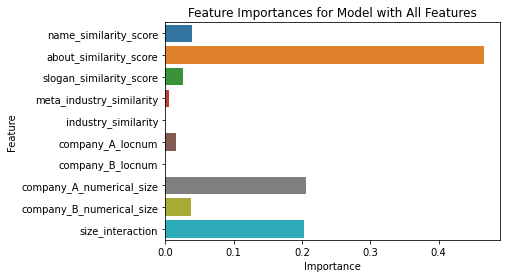

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

importances_list = rfModel1.featureImportances.toArray().tolist()
feature_cols_ordered = [feature_col1[i] for i in range(len(importances_list))]

sns.barplot(x=importances_list, y=feature_cols_ordered)
plt.title('Feature Importances for Model with All Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on this analysis, we want to keep only the name, about, slogan, and numerical size features. We will implement the model again.

### Step 4: Retraining the model with important features

In [0]:
### Create general features:

def extract_small_features_from_data(data, train):
    """
    Assume data contains the columns in similarity_features_cols.
    Create a features df for random forest model
    """

    # about (with stemming):
    data = data.withColumn('about_similarity_score', similarity_udf(col('company_A_about'), col('company_B_about'), lit(True)))

    # name (without stemming):
    data = data.withColumn('name_similarity_score', similarity_udf(data['company_A_name'], data['company_B_name'], lit(False)))

    # slogan (without stemming):
    data = data.withColumn('slogan_similarity_score', similarity_udf(data['company_A_slogan'], data['company_B_slogan'], lit(False)))

    # interval numerical variable for compay size:
    comp_size_dict = {
        '': 0,
        'None': 0,
        '1 employee': 1,
        '2-10 employees': 2,
        '11-50 employees': 3,
        '51-200 employees': 4,
        '201-500 employees': 5,
        '501-1,000 employees': 6,
        '1,001-5,000 employees': 7,
        '5,001-10,000 employees': 8,
        '10,001+ employees': 9
    }
    comp_size_udf = udf(lambda x: comp_size_dict.get(x, 0), IntegerType())

    data = data.withColumn('company_A_numerical_size',
                            when(col('company_A_company_size').isNull() | 
                                    (col('company_A_company_size') == 'None') | 
                                    (col('company_A_company_size') == ''), 0)
                            .otherwise(comp_size_udf(col('company_A_company_size'))))
    data = data.withColumn('company_B_numerical_size',
                            when(col('company_B_company_size').isNull() | 
                                    (col('company_B_company_size') == 'None') | 
                                    (col('company_B_company_size') == ''), 0)
                            .otherwise(comp_size_udf(col('company_B_company_size'))))

    ## Interaction features between same variables (for better importance comparison):
    # sizes of companies interaction:
    data = data \
        .withColumn("size_interaction", col("company_A_numerical_size") * col("company_B_numerical_size"))


    # final features df:
    if train:
        final_data_features = data.select('name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction', 'similarity_label')
    else:
        final_data_features = data.select('name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction', 'company_B_url')

    return final_data_features

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

final_data_features = extract_small_features_from_data(data, train=True)
feature_cols = ['name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Define the classifier:
rf = RandomForestClassifier(labelCol="similarity_label", featuresCol="features", numTrees=10)

# Define a Pipeline:
pipeline = Pipeline(stages=[assembler, rf])

# Split the data into training and test sets:
(train_data, test_data) = final_data_features.randomSplit([0.7, 0.3])

# Train the model:
smaller_model = pipeline.fit(train_data)

In [0]:
# Make predictions on the test data:
test_predictions2 = smaller_model.transform(test_data)

# Evaluate the predictions for accuracy:
evaluator = MulticlassClassificationEvaluator(
    labelCol="similarity_label",
    predictionCol="prediction",
    metricName="accuracy"
)
test_accuracy2 = evaluator.evaluate(test_predictions2)
print(f"Test Accuracy: {test_accuracy2}")

Test Accuracy: 0.9555054854808482


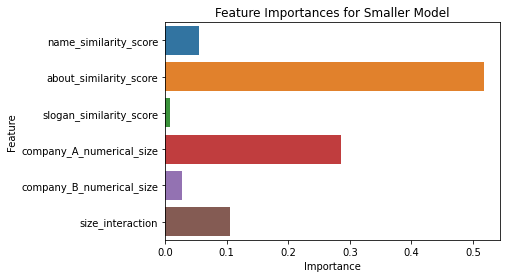

In [0]:
# Evaluate Feature Importances:
rfModel = smaller_model.stages[-1]
importances = rfModel.featureImportances

import matplotlib.pyplot as plt
import seaborn as sns

importances_list = rfModel.featureImportances.toArray().tolist()
feature_cols_ordered = [feature_cols[i] for i in range(len(importances_list))]

sns.barplot(x=importances_list, y=feature_cols_ordered)
plt.title('Feature Importances for Smaller Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [0]:
# Define the path where you want to save the model in DBFS
model_path = "/FileStore/shared_uploads/naomi.derel@campus.technion.ac.il/companies_model/rf_companies_similarity"

# Save the model
smaller_model.save(model_path)

### Step 4: Inference Self-Sufficient Example (for a new company, find most similar one)

In [0]:
informative_companies_df = companies.sample(withReplacement=False, fraction=0.0001, seed=42) # TODO: change this to be a small number of companies we have the interview questions for
print(informative_companies_df.count())

my_company = companies.orderBy(rand()).limit(1) #TODO: change this to be a single company we are currently looking for
print(my_company.count())

135
1


In [0]:
from pyspark.sql.functions import lit

similarity_features_cols_short = ['name', 'about', 'company_size','slogan']
similarity_features_cols = ['company_A_name', 'company_B_name', 'company_A_about', 'company_B_about', 'company_A_company_size', 'company_B_company_size', 'company_A_slogan', 'company_B_slogan']

df_alias = informative_companies_df.alias("df")
single_row_alias = my_company.alias("single_row")

for col_name in similarity_features_cols_short:
    single_row_alias = single_row_alias.withColumnRenamed(col_name, "company_A_" + col_name)
    df_alias = df_alias.withColumnRenamed(col_name, "company_B_" + col_name)
df_alias = df_alias.withColumnRenamed('url', "company_B_url")

# Cross join the single row with the entire DataFrame
combined_df = single_row_alias.crossJoin(df_alias)
combined_df = combined_df.select(*similarity_features_cols, 'company_B_url')

# Show the result
combined_df.display()

company_A_name company_B_name company_A_about company_B_about company_A_company_size company_B_company_size company_A_slogan company_B_slogan company_B_url WENDY GLASGOW CLOUGH Effortless Healing null null 2-10 employees 11-50 employees null null https://www.linkedin.com/company/effortless-healing WENDY GLASGOW CLOUGH Andrade’s Music Lessons null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/andrade%E2%80%99s-music-lessons WENDY GLASGOW CLOUGH LIN K MCNULTY null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/lin-k-mcnulty WENDY GLASGOW CLOUGH HAROLD E CHAMBERLAIN null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/harold-e-chamberlain WENDY GLASGOW CLOUGH CARMEN JIMENEZ null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/carmen-jimenez WENDY GLASGOW CLOUGH MONA JASUJA null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/mona-jasuja WENDY GLASGOW CLOUGH SERESA HOUSTON null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/seresa-houston WENDY GLASGOW CLOUGH LUZ RODRIGUEZ null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/luz-rodriguez WENDY GLASGOW CLOUGH AKA TREE REMOVAL AND LAWN MAINTENANCE LLC null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/aka-tree-removal-and-lawn-maintenance-llc WENDY GLASGOW CLOUGH GIRARD SCHOOL IRRV TR null null 2-10 employees null null null https://www.linkedin.com/company/girard-school-irrv-tr WENDY GLASGOW CLOUGH KELLY, VICKY LYNN null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/kelly-vicky-lynn WENDY GLASGOW CLOUGH GARFIELD JENKINS null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/garfield-jenkins WENDY GLASGOW CLOUGH AMANDA R. W. STEINER null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/amanda-r.-w.-steiner WENDY GLASGOW CLOUGH ROSEMARY REYES null null 2-10 employees 11-50 employees null null https://www.linkedin.com/company/rosemary-reyes WENDY GLASGOW CLOUGH Lefferts Historic House null null 2-10 employees 11-50 employees null null https://www.linkedin.com/company/lefferts-historic-house WENDY GLASGOW CLOUGH Allstate Insurance: Steve Wong null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/allstate-insurance-steve-wong WENDY GLASGOW CLOUGH DIXON & 51ST TIC 24, LLC null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/dixon-&-51st-tic-24-llc WENDY GLASGOW CLOUGH NILES WEST MUSIC PARENTS ASSOCIATION null null 2-10 employees null null null https://www.linkedin.com/company/niles-west-music-parents-association WENDY GLASGOW CLOUGH JD Fisk null null 2-10 employees 2-10 employees null null https://www.linkedin.com/company/jd-fisk WENDY GLASGOW CLOUGH Evolution Martial Arts x Fitness null Evolution Martial Arts x CrossFit is one of the first and only traditional martial arts academy and affiliated CrossFit gyms in the San Fernando Valley. Located in the Chatsworth / Northridge area, Evolution offers Hapkido martial arts and CrossFit classes for adults, families, and children. 2-10 employees 2-10 employees null null https://www.linkedin.com/company/evolution-martial-arts-academy WENDY GLASGOW CLOUGH Planet Joe Pod null Planet Joe Pod - Not just another podcast. this one is out of this world. Sexuality, Atheism, Science, Philosophy and much more is discussed on this planet. 2-10 employees 1 employee null Planet Joe Pod - Not just another podcast. this one is out of this world. https://www.linkedin.com/company/planet-joe-pod WENDY GLASGOW CLOUGH Good Rehab Therapy null The domain name goodrehabtherapy.com is for sale. Call BuyDomains at 866-818-5931 to get a price quote and get your business online today! 2-10 employees 2-10 employees null null https://www.linkedin.com/company/good-rehab-therapy WENDY GLA

In [0]:
# NLP imports:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Pyspark imports
from pyspark.sql.functions import udf, abs, size, col, when, concat, array, lit, rand, count, explode, regexp_replace, expr
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, IntegerType

# download NLTK stopwords:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('punkt')
stemmer = PorterStemmer()

# define a function for stemming:
def stem_text(text):
    """
    Tokenize text and remove stopwords.
    input: text to tokenize
    output: preprocessed text
    """
    tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

# define a function to calculate similarity between 2 text blocks:
def calculate_similarity(text1, text2, stemming=True):
    """
    Find cosine similarity between tf-idf vectors of the input texts.
    ouput: single similarity score
    """
    # if one or more of the texts are empty, define as 0 similarity:
    if text1 is None or text2 is None:
        return 0.0
    
    # preprocess the texts if neccesary: (not good for short imputs like names)
    if stemming:
        text1 = stem_text(text1)
        text2 = stem_text(text2)

    # create TF-IDF vectors:
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])

    # calculate cosine similarity:
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    return float(similarity_score)

# udf for text similarity:
similarity_udf = udf(lambda text1, text2, stemming: calculate_similarity(text1, text2, stemming), DoubleType())

### Create general features:

def extract_small_features_from_data(data, train):
    """
    Assume data contains the columns in similarity_features_cols.
    Create a features df for random forest model
    """

    # about (with stemming):
    data = data.withColumn('about_similarity_score', similarity_udf(col('company_A_about'), col('company_B_about'), lit(True)))

    # name (without stemming):
    data = data.withColumn('name_similarity_score', similarity_udf(data['company_A_name'], data['company_B_name'], lit(False)))

    # slogan (without stemming):
    data = data.withColumn('slogan_similarity_score', similarity_udf(data['company_A_slogan'], data['company_B_slogan'], lit(False)))

    # interval numerical variable for compay size:
    comp_size_dict = {
        '': 0,
        'None': 0,
        '1 employee': 1,
        '2-10 employees': 2,
        '11-50 employees': 3,
        '51-200 employees': 4,
        '201-500 employees': 5,
        '501-1,000 employees': 6,
        '1,001-5,000 employees': 7,
        '5,001-10,000 employees': 8,
        '10,001+ employees': 9
    }
    comp_size_udf = udf(lambda x: comp_size_dict.get(x, 0), IntegerType())

    data = data.withColumn('company_A_numerical_size',
                            when(col('company_A_company_size').isNull() | 
                                    (col('company_A_company_size') == 'None') | 
                                    (col('company_A_company_size') == ''), 0)
                            .otherwise(comp_size_udf(col('company_A_company_size'))))
    data = data.withColumn('company_B_numerical_size',
                            when(col('company_B_company_size').isNull() | 
                                    (col('company_B_company_size') == 'None') | 
                                    (col('company_B_company_size') == ''), 0)
                            .otherwise(comp_size_udf(col('company_B_company_size'))))

    ## Interaction features between same variables (for better importance comparison):
    # sizes of companies interaction:
    data = data \
        .withColumn("size_interaction", col("company_A_numerical_size") * col("company_B_numerical_size"))


    # final features df:
    if train:
        final_data_features = data.select('name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction', 'similarity_label')
    else:
        final_data_features = data.select('name_similarity_score', 'about_similarity_score', 'slogan_similarity_score', 'company_A_numerical_size', 'company_B_numerical_size', 'size_interaction', 'company_B_url')

    return final_data_features

# UDF to extract the probability of class 1 from the vector
def extract_class_1_probability(probability_vector):
    return float(probability_vector[1])

# Register UDF
extract_prob = udf(extract_class_1_probability, FloatType())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from pyspark.ml.classification import RandomForestClassificationModel
from pyspark.ml import PipelineModel
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType

## Load your trained Random Forest model
model_path = "/FileStore/shared_uploads/naomi.derel@campus.technion.ac.il/companies_model/rf_companies_similarity"
model = PipelineModel.load(model_path)

# Extract features and include identifiers for prediction
df = extract_small_features_from_data(combined_df, train=False)

# Make predictions as before
predictions = model.transform(df)

# Extract the probability of class 1 and include identifiers
predictions_with_prob = predictions.withColumn("probability_class_1", extract_prob("probability"))

# Order by probability and retain the company identifier
max_prob_row = predictions_with_prob.orderBy(col("probability_class_1").desc()).select("company_B_url", "probability_class_1").first()

print(max_prob_row)

Row(company_B_url='https://www.linkedin.com/company/burlington-county-institute-of-technology', probability_class_1=0.7645519971847534)


In [0]:
url_of_best_informative_company = max_prob_row['company_B_url']

best_company_record = companies.filter(col("url") == url_of_best_informative_company)
best_company_name = best_company_record.first()['name']
print(best_company_name)

Burlington County Institute of Technology
